# Load libs

In [31]:
%reload_ext autoreload
%autoreload 2

import os
import sys
sys.path.insert(0, '../')
sys.path.insert(0,"../scripts/")

import requests
import pandas as pd
import datetime
import shutil
from PyPDF2 import PdfFileMerger

from scripts import io

In [32]:
import plotly.express as px

In [33]:
! ls ../data/generic/pdf/ass/

2002  2008  2010  2012	2014  2016  2020
2007  2009  2011  2013	2015  2017  controle_ass.csv


In [9]:
df = pd.read_csv('../data/generic/pdf/ass/controle_ass.csv')

df['date'] = pd.to_datetime(df['date'], format = "%d/%m/%Y")

df = df.sort_values(by='date')

In [11]:
df['documentos'] = df['documentos'].rolling(7).mean()

In [12]:
fig = px.line(df, x='date',y='documentos')

fig = fig.update_layout(hovermode="x unified")

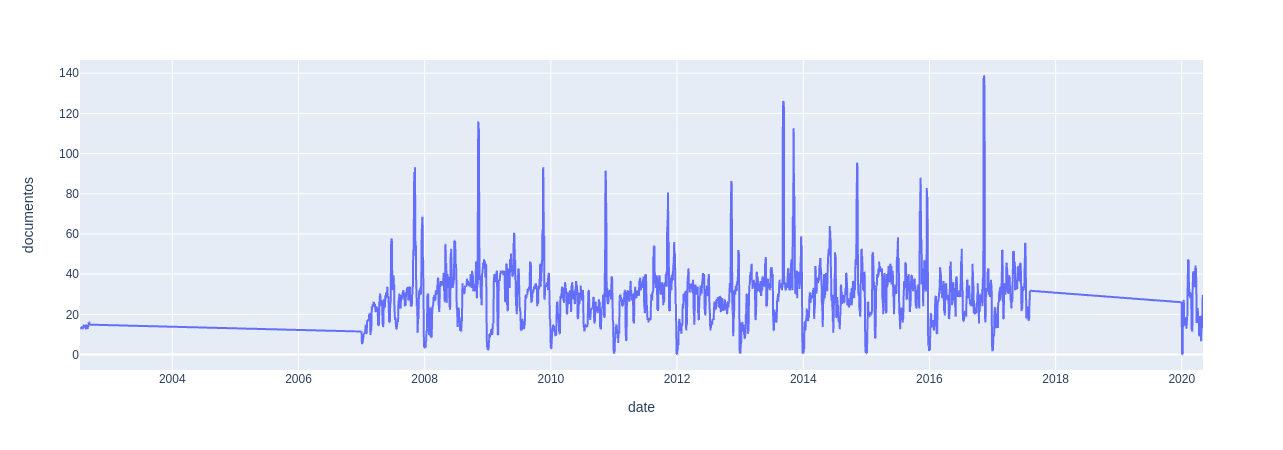

In [13]:
fig

# Set Download parameters

In [7]:
d=0
date_start = datetime.datetime.today()
date_start = datetime.datetime.strptime("2005-01-01", "%Y-%m-%d")
#options legislativo , exec1, exec2
poder = "exec2"

fix_path =f'../data/pdf/{poder}'

datelist = pd.date_range(date_start - datetime.timedelta(days=d), date_start).tolist()

df = pd.read_csv(f'{fix_path}/controle_{poder}.csv')
controle_dates = df['date'].to_list()

download_dates = [date for date in datelist if date.strftime('%d/%m/%Y') not in controle_dates]

In [8]:
download_dates[:10]

[]

In [5]:

for date in download_dates:
    
    ano = date.strftime('%Y')
    mes_name = io.get_month_name(date.strftime('%m'))
    mes_number = date.strftime('%m')
    dia = date.strftime('%d')
    
    pg=1
    status_code = 200
    io.make_dir(fix_path,ano,mes_number,dia)

    while status_code == 200:

        url =  io.get_url_last_versions(poder,ano,mes_name,dia,pg)
#         print(url)
        
        r = requests.get(url, stream=True)
        status_code = r.status_code
        
        if status_code == 200:
            with open(f'{fix_path}/{ano}/{mes_number}/{dia}/pg_000{pg}.pdf', 'wb') as file:
                file.write(r.content)
            pg+=1

        else:
            arquivo = 0
            pg-=1
            pass

        
    url =  io.get_url_last_versions(poder,ano,mes_name,dia,pg)
    
    if (arquivo==0) & (pg==0):
        existe = 'nao'
        exist  = 'nao existe'
        
        shutil.rmtree(f'{fix_path}/{ano}/{mes_number}/{dia}', ignore_errors=True)
        
    else:
        existe = 'sim'
        exist  = 'existe'
        
        io.merge_pdf(fix_path,ano, mes_number, dia)
        
        
        
        
        
        
        
    
    data = date.strftime('%d/%m/%Y')
    print(f'Diario do dia {data}, {exist} e tem {pg} paginas' '  -  ', url)
    
    dd = pd.DataFrame([date.strftime('%d/%m/%Y')], columns=['date'])
    dd['diario_existe'] = existe
    dd['paginas'] = pg
    
    dd.to_csv(f'{fix_path}/controle_{poder}.csv', index=False, mode='a', header=False)

Diario do dia 01/01/2005, nao existe e tem 0 paginas  -   http://diariooficial.imprensaoficial.com.br/doflash/prototipo/2005/Janeiro/01/exec2/pdf/pg_0000.pdf


# Searching

In [1]:
import pdftotext

def find_in_pdf(path, string):
    with open(path, "rb") as f:
        pdf = pdftotext.PDF(f)
        
    pages = {}
    
    for i in range(len(pdf)):
    #     print(i,'\n', pdf[i])
        content = pdf[i].replace('(','').replace(')','').replace('\n','')
        search = content.count(string)

        if search!=0:
            pages[i+1] = search
#         else:
#             pages[i] = 0
    return pages

In [2]:
#options legislativo , exec1, exec2
poder = 'legislativo'
ano   = 2020
mes_number = '04' 

path = f'../data/pdf/{poder}/{ano}/{mes_number}'
files = os.listdir(path)
pdf_files = [file for file in files if file.split('.')[1] == 'pdf']




NameError: name 'os' is not defined

In [312]:

strings = ['Kamilos']

df_final = pd.DataFrame()

for pdf_file in pdf_files:
    for string in strings:
        pdf_file_path = f'{path}/{pdf_file}'
        pages = find_in_pdf(pdf_file_path,string)

        df = pd.DataFrame(pages.keys(), columns=['pagina'])
        df['contagem'] = pages.values()
        df['busca']    = string
        df['arquivo']  = pdf_file
        cols = ['arquivo', 'busca', 'contagem', 'pagina']
        
        
        df_final = pd.concat([df_final,df[cols]],0)

In [313]:
df_final

,arquivo,busca,contagem,pagina
0,2020-04-30.pdf,Kamilos,1.0,26


In [116]:
text

b''

In [49]:
print(raw['content'])



























 www.imprensaoficial.com.br

Estado de São Paulo

Poder 
Legislativo
Diário da Assembleia Legislativa  –  19ª Legislatura

Cauê Macris – Presidente Enio Tatto:  1º Secretário
Milton Leite Filho: 2º Secretário
Bruno Ganem: 3º Secretário
Léo Oliveira:  4º Secretário

Gilmaci Santos:  1º Vice-Presidente
Ricardo Madalena:
Coronel Telhada:
Barros Munhoz:

 2º Vice-Presidente
3º Vice-Presidente
4º Vice-Presidente   

 
 

Palácio 9 de Julho   •   Av. Pedro Álvares Cabral, 201   •   Ibirapuera   •   São Paulo   •   CEP 04097-900   •   Tel. 11 3886-6000 www.al.sp.gov.br

Volume 130   •   Número 77  •  São Paulo, quinta-feira, 30 de abril de 2020

Congresso de comissões aprova projeto de 
resolução que corta custos na Alesp
DA REDAÇÃO 
FOTO: CAROL JACOB

Realizada na manhã desta 
quarta-feira (29/4), congresso 
de comissões - que aglutinou as 
comissões de Constituição, Jus-
tiça e Redação, além de Finanças 
Orçamento e Planejamento  - 
aprovou parecer da relator, de-
